# Shengping Jiang

Springboard ML course unit 20.5 Capstone Submissions Capstone Submissions
Machine Learning Engineering Career Track Capstone: Machine Learning / Deep Learning Prototype

Capstone project: This project will build a ML application for recognizing people with masked face. It is a research project.
Goals of the project:
* Able to recognize a person as same person when he/she is with or without a mask, from a webcam or IP camera
* It will be deploymented as a web application or a off-line application (Windows version or/and Linux version)
* It can be used in a small or middle size company for general entry management

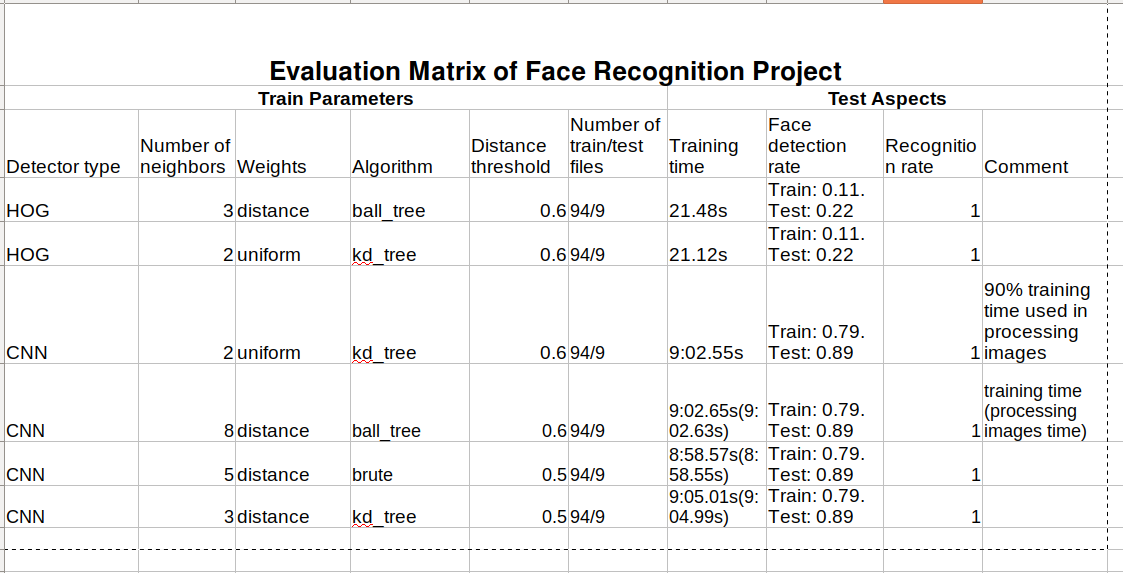

In [1]:
# jsp_kneighbors_face.ipynb
# Use face_recognition to identify masked face
import numpy as np
import os
import face_recognition as frg
from sklearn.neighbors import KNeighborsClassifier
import re
import math
import matplotlib.pyplot as plt

In [3]:
# We define a train function

def kntrain(X, y, neighbors, kn_alg, weight):
    if neighbors is None:
        neighbors = int(math.sqrt(len(X)))
    klf1 = KNeighborsClassifier(algorithm=kn_alg, n_neighbors=neighbors, weights=weight)
    klf1.fit(X,y)
    return klf1, neighbors            

In [18]:
# Train KNN model
# Create training matrix X, y
from timeit import default_timer as timer
from datetime import timedelta
start = timer()

extension = ['jpg','png','bmp','jpeg']
X =[]
y =[]

tfiles = 0  #Total number of train files
dfiles = 0  #Number of files detected face

for (root,dirs,files) in os.walk('maskedface3'):
    pattern = '^\w+/train/\w+'
    if re.match(pattern, root):
        print('root:',root)
        print('files:',files)
        label0 = root.split('/')[-1]
        for imgf in files:
            imgf = imgf.lower()
            if imgf.split('.')[1] in extension:
                imgpath = os.path.join(root, imgf)
                tfiles += 1
                npimg = frg.load_image_file(imgpath, mode='RGB')
                # Use model='hog' for non-masked face. Use model='cnn' for masked face
                #f_location = frg.face_locations(npimg, model='hog')
                f_location = frg.face_locations(npimg, model='cnn')
                #print('imgpath:',imgpath)
                #print('label0:',label0)                
                if len(f_location) == 1:
                    print('fpath:',imgpath)
                    print('f_location:',f_location)   
                    f_encord = frg.face_encodings(npimg,known_face_locations=f_location)[0]
                    X.append(f_encord)
                    y.append(label0)
                    dfiles += 1
                else:
                    print('Incorrect face image!')    
            else:
                print('File $s has wrong format' % imgf)

end = timer()
print('Processing images elapsed time:',timedelta(seconds=end-start))                
klf, neighbor = kntrain(X, y, neighbors=3, kn_alg='kd_tree', weight='distance')
print('Number of neighbors:', neighbor)
print('Face detection rate of train samples:', (dfiles/tfiles))
print('Number of train sample files:', tfiles)
end = timer()
print('Train procedure elapsed time:',timedelta(seconds=end-start))


root: maskedface3/train/00001
files: ['001.jpg', '008.jpg', '003.jpg', '004.jpg', '002.jpg', '005.jpg', '000.jpg', '009.jpg', '006.jpg', '007.jpg']
fpath: maskedface3/train/00001/001.jpg
f_location: [(215, 313, 333, 195)]
fpath: maskedface3/train/00001/008.jpg
f_location: [(184, 351, 429, 106)]
fpath: maskedface3/train/00001/003.jpg
f_location: [(231, 393, 435, 189)]
fpath: maskedface3/train/00001/004.jpg
f_location: [(231, 372, 435, 168)]
fpath: maskedface3/train/00001/002.jpg
f_location: [(231, 372, 435, 168)]
fpath: maskedface3/train/00001/005.jpg
f_location: [(231, 372, 435, 168)]
fpath: maskedface3/train/00001/000.jpg
f_location: [(184, 351, 429, 106)]
fpath: maskedface3/train/00001/009.jpg
f_location: [(184, 351, 429, 106)]
fpath: maskedface3/train/00001/006.jpg
f_location: [(251, 331, 455, 127)]
Incorrect face image!
root: maskedface3/train/00002
files: ['001.jpg', '003.jpg', '004.jpg', '011.jpg', '002.jpg', '005.jpg', '013.jpg', '012.jpg', '009.jpg', '006.jpg', '010.jpg', '007.

In [19]:
# Create test image list
Xt=[]   #Test images encoding
ft=[]   #Test image file path
lt=[]   #Face location in image
ttfiles = 0  #Number of test files

for (root,dirs,files) in os.walk('maskedface3/test'):
    if (files!=""):
        for f1 in files:
            label1 = f1.split('.')[0]
            f1path = os.path.join(root,f1)
            f1img = frg.load_image_file(f1path, mode='RGB')
            ttfiles += 1
            # Use model='hog' for non-masked face. Use model='cnn' for masked face
            #f_location = frg.face_locations(npimg, model='hog')
            f_locations = frg.face_locations(f1img, model='cnn')
            f_encodings = frg.face_encodings(f1img, known_face_locations=f_locations)
            print('len(f_locations):',len(f_locations))
            for i in range(len(f_encodings)):
                Xt.append(f_encodings[i])
                lt.append(f_locations[i])
                ft.append(f1path)
print(len(Xt))
print(len(lt))
print(ft)
print('Number of test sample files:', ttfiles)
print('Face detection rate of test sample:', (len(Xt)/ttfiles))

len(f_locations): 1
len(f_locations): 0
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
len(f_locations): 1
8
8
['maskedface3/test/00003.jpg', 'maskedface3/test/00001.jpg', 'maskedface3/test/00505.jpg', 'maskedface3/test/00515.jpg', 'maskedface3/test/00192.jpg', 'maskedface3/test/00394.jpg', 'maskedface3/test/00002.jpg', 'maskedface3/test/00004.jpg']
Number of test sample files: 9
Face detection rate of test sample: 0.8888888888888888


In [20]:
# This funcation can show the real image size inline, and draw label text
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def show_labels_on_image2(img_path, location, label_index):
    pil_image = Image.open(img_path).convert("RGB")
    (top,right, bottom, left) = location
    name = y[label_index]     # get predicted name
    #name = name.encode("UTF-8")
    draw = ImageDraw.Draw(pil_image)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    # Define font type and size. The font file is in my ubuntu 18.04. Font size is 14
    font_file = '/usr/share/fonts/truetype/freefont/FreeSansBold.ttf'
    font = ImageFont.truetype(font_file, 16)
    text_w,text_h = font.getsize(name)
    #text_width, text_height = draw.textsize(name)
    
    draw.text((left + 5, bottom + text_h), name, font=font, fill=(255, 255, 255, 255))

    #Below will pop up a image window
    #pil_image.show()
    #Below shows image inline
    display(pil_image)

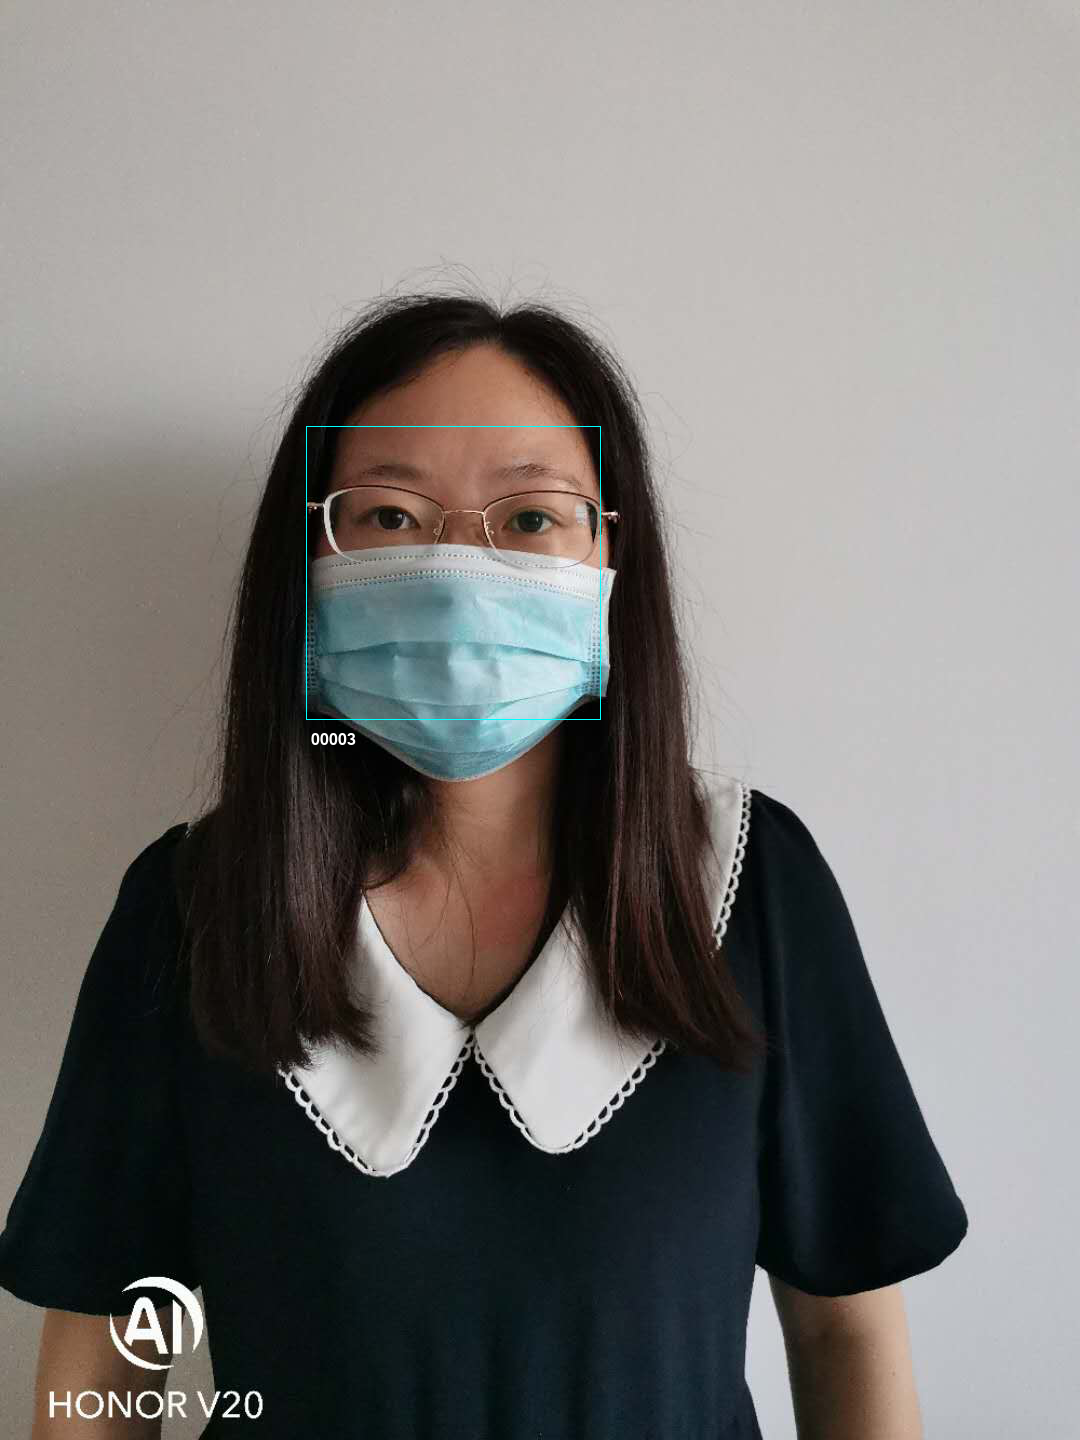

Test image: maskedface3/test/00003.jpg


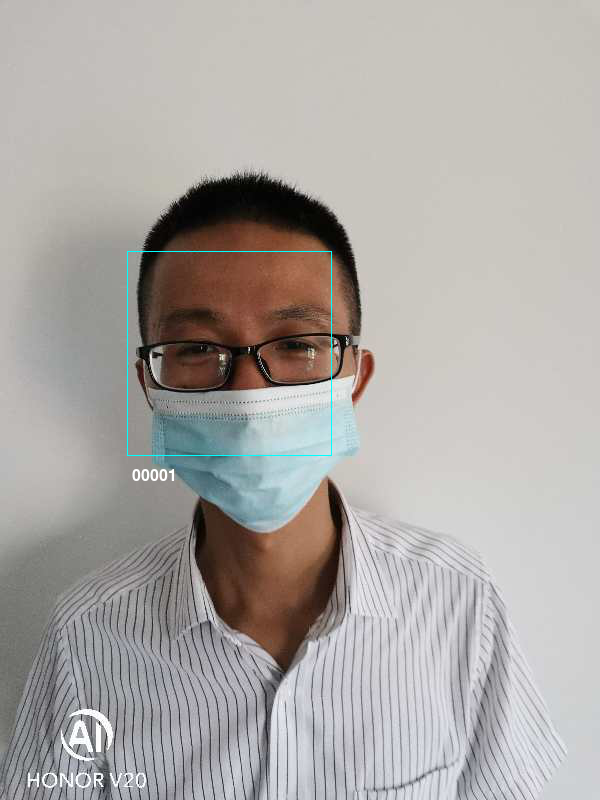

Test image: maskedface3/test/00001.jpg


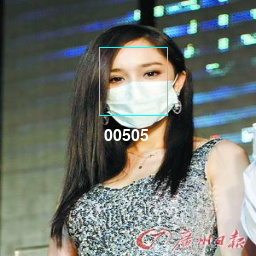

Test image: maskedface3/test/00505.jpg


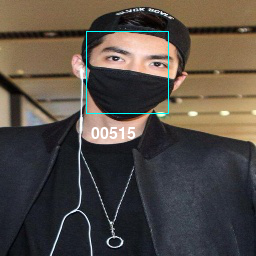

Test image: maskedface3/test/00515.jpg


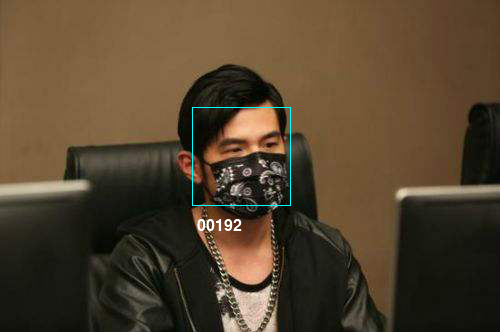

Test image: maskedface3/test/00192.jpg


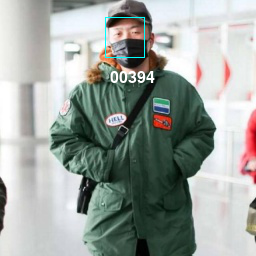

Test image: maskedface3/test/00394.jpg


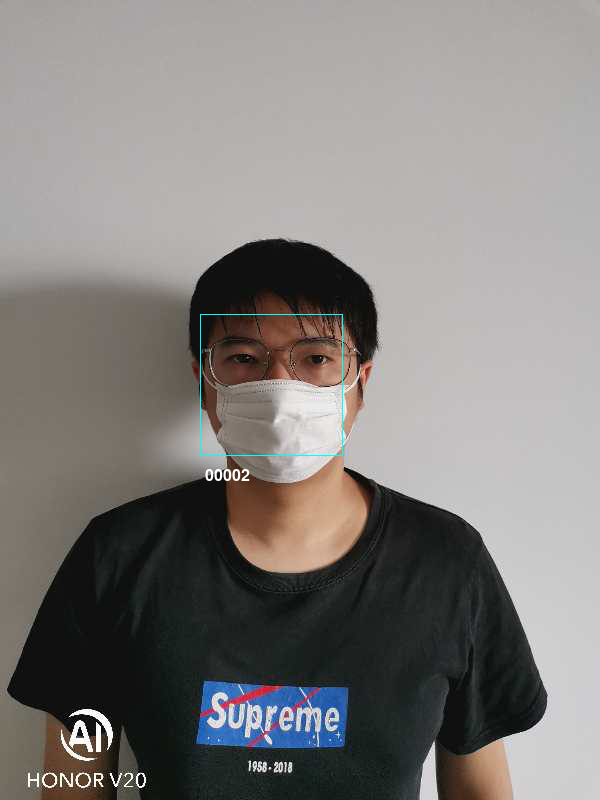

Test image: maskedface3/test/00002.jpg


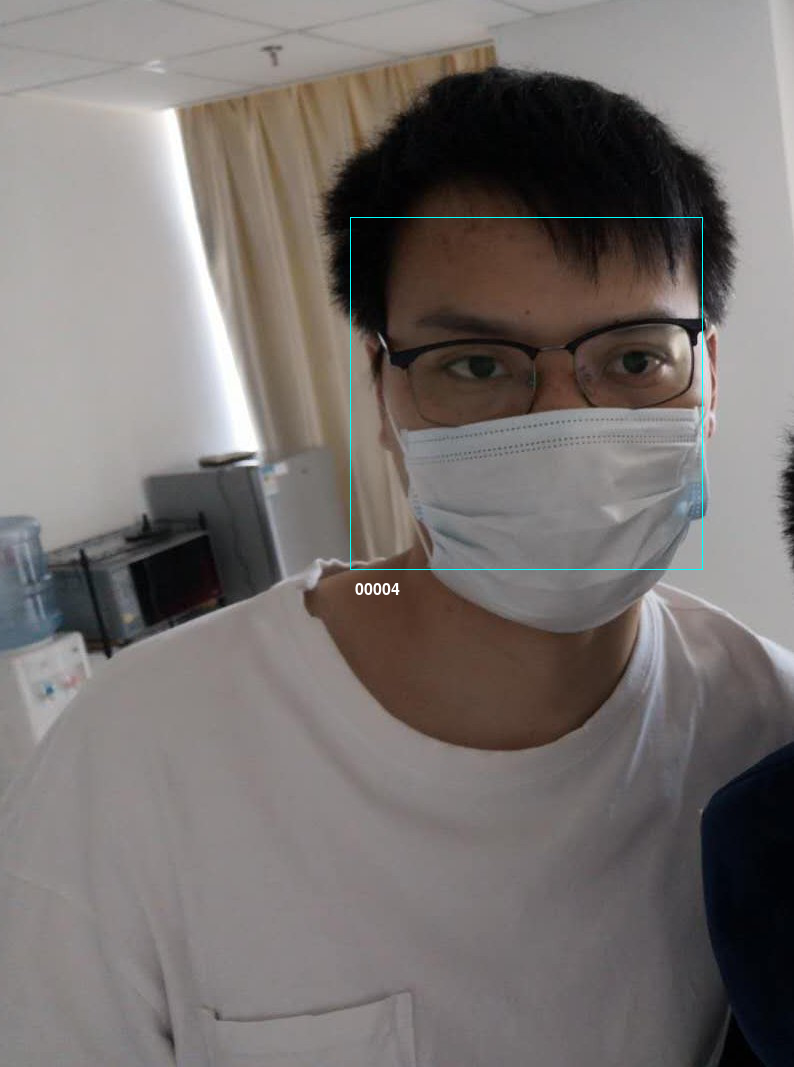

Test image: maskedface3/test/00004.jpg
Face recognition rate: 1.0


In [21]:
# Test all images on trained knn model
dist_threshold = 0.5
face_recog_rate = 0
for i in range(len(Xt)):
    xt = Xt[i].reshape(1,-1)
    closest_distance = klf.kneighbors(xt, n_neighbors=1, return_distance=True)
    if closest_distance[0][0][0] <= dist_threshold:
        # Below closest_distance[1][0][0] is label (y) indices
        show_labels_on_image2(ft[i], lt[i], closest_distance[1][0][0])
        print('Test image:', ft[i])
        name = y[closest_distance[1][0][0]]     # get predicted name
        if ft[i].find(name) != -1:
            face_recog_rate += 1
print('Face recognition rate:', face_recog_rate/len(Xt))